In [1]:
# Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Preprocessing

In [2]:
# Reading both dataset files.
data_floored = pd.read_csv("Total Floored Area.csv")
data_planning = pd.read_csv("Planning Permissions.csv")

In [3]:
# Checking top 5 rows for the dataset floored area.
data_floored.head()

STATISTIC                                    Statistic Label  C01921V02511  \
0     BHQ09  Total Floored Area for which Permission Grante...             1   
1     BHQ09  Total Floored Area for which Permission Grante...             1   
2     BHQ09  Total Floored Area for which Permission Grante...             1   
3     BHQ09  Total Floored Area for which Permission Grante...             1   
4     BHQ09  Total Floored Area for which Permission Grante...             1   

  Type of Development C02074V02506        Functional Category C02196V02652  \
0    New construction            -  All functional categories            -   
1    New construction            -  All functional categories            -   
2    New construction            -  All functional categories            -   
3    New construction            -  All functional categories            -   
4    New construction            -  All functional categories            -   

  Region  TLIST(Q1) Quarter           UNIT   VALUE  
0  State      20091  2009Q1  000 Sq Metres  2960.0  
1  State      20092  2009Q2  000 Sq Metres  2625.0  
2  State      20093  2009Q3  000 Sq Metres  2188.0  
3  State      20094  2009Q4  000 Sq Metres  1220.0  
4  State      20101  2010Q1  000 Sq Metres  1147.0

In [4]:
# Checking top 5 rows for the dataset planning permission granted.
data_planning.head()

STATISTIC               Statistic Label C01921V02511  \
0     BHQ08  Planning Permissions Granted            -   
1     BHQ08  Planning Permissions Granted            -   
2     BHQ08  Planning Permissions Granted            -   
3     BHQ08  Planning Permissions Granted            -   
4     BHQ08  Planning Permissions Granted            -   

         Type of Development C02074V02506        Functional Category  \
0  All types of construction            -  All functional categories   
1  All types of construction            -  All functional categories   
2  All types of construction            -  All functional categories   
3  All types of construction            -  All functional categories   
4  All types of construction            -  All functional categories   

  C02196V02652 Region  TLIST(Q1) Quarter    UNIT   VALUE  
0            -  State      20091  2009Q1  Number  7486.0  
1            -  State      20092  2009Q2  Number  6756.0  
2            -  State      20093  2009Q3  Number  6655.0  
3            -  State      20094  2009Q4  Number  5137.0  
4            -  State      20101  2010Q1  Number  4519.0

In [5]:
# Removing columns which are useless and are not used in analysis.
data_floored = data_floored.drop(['STATISTIC', 'C01921V02511', 'C02074V02506', 'C02196V02652', 'UNIT', 'Quarter'], axis = 1)
data_floored.head()

Statistic Label Type of Development  \
0  Total Floored Area for which Permission Grante...    New construction   
1  Total Floored Area for which Permission Grante...    New construction   
2  Total Floored Area for which Permission Grante...    New construction   
3  Total Floored Area for which Permission Grante...    New construction   
4  Total Floored Area for which Permission Grante...    New construction   

         Functional Category Region  TLIST(Q1)   VALUE  
0  All functional categories  State      20091  2960.0  
1  All functional categories  State      20092  2625.0  
2  All functional categories  State      20093  2188.0  
3  All functional categories  State      20094  1220.0  
4  All functional categories  State      20101  1147.0

In [6]:
# Removing columns which are useless and are not used in analysis
data_planning = data_planning.drop(['STATISTIC', 'C01921V02511', 'C02074V02506', 'C02196V02652', 'UNIT', 'Quarter'], axis = 1)
data_planning.head()

Statistic Label        Type of Development  \
0  Planning Permissions Granted  All types of construction   
1  Planning Permissions Granted  All types of construction   
2  Planning Permissions Granted  All types of construction   
3  Planning Permissions Granted  All types of construction   
4  Planning Permissions Granted  All types of construction   

         Functional Category Region  TLIST(Q1)   VALUE  
0  All functional categories  State      20091  7486.0  
1  All functional categories  State      20092  6756.0  
2  All functional categories  State      20093  6655.0  
3  All functional categories  State      20094  5137.0  
4  All functional categories  State      20101  4519.0

In [7]:
# getting summary statistics for planning data.
data_planning.describe()

TLIST(Q1)         VALUE
count  14256.00000  12310.000000
mean   20132.50000    164.350284
std       25.84499    462.054753
min    20091.00000      1.000000
25%    20111.75000      8.000000
50%    20132.50000     27.000000
75%    20153.25000    116.000000
max    20174.00000   7486.000000

In [8]:
# Calculate z-scores for the column
z_scores = np.abs((data_planning['VALUE'] - data_planning['VALUE'].mean()) / data_planning['VALUE'].std())

# Set a threshold for z-score
threshold = 2.5

# Remove outliers based on the threshold
data_planning = data_planning[z_scores <= threshold]
data_planning.shape

(11993, 6)

In [9]:
# Getting summary statistics for floored area dataset.
data_floored.describe()

TLIST(Q1)        VALUE
count   8316.000000  8209.000000
mean   20132.500000    66.818248
std       25.845638   180.959321
min    20091.000000     0.000000
25%    20111.750000     4.000000
50%    20132.500000    13.000000
75%    20153.250000    52.000000
max    20174.000000  3419.000000

In [10]:
# Calculate z-scores for the column
z_scores = np.abs((data_floored['VALUE'] - data_floored['VALUE'].mean()) / data_floored['VALUE'].std())

# Set a threshold for z-score
threshold = 2.5

# Remove outliers based on the threshold
data_floored = data_floored[z_scores <= threshold]
data_floored.shape

(7986, 6)

In [11]:
# Save both dataframes in temporary variables
data_floored_temp = data_floored
data_planning_temp = data_planning

In [12]:
# Join both datasets and create a master dataset.
master = data_floored.append(data_planning)
master.shape

(19979, 6)

In [13]:
# Checking categorical column 'Type of development' for invalid values.
master['Type of Development'].unique()

array(['New construction', 'Extensions',
       'All new construction and extensions', 'All types of construction',
       'Alteration and Conversion'], dtype=object)

In [14]:
# Checking categorical column 'functional category' for invalid users.
master['Functional Category'].unique()

array(['All functional categories', 'Dwellings', 'Commercial Buildings',
       'Buildings for Agriculture', 'Industrial Buildings',
       'Govt., Health and Education', 'Other Buildings for Social Use',
       'Civil Engineering', 'Other functional categories'], dtype=object)

In [15]:
# Checking categorical column 'region' for invalid users.
master['Region'].unique()

array(['Border, Midland and Western', 'Border', 'Midland', 'West',
       'Southern and Eastern', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West', 'State'], dtype=object)

In [16]:
# Checking categorical column 'statistic label' for invalid users.
master['Statistic Label'].unique()

array(['Total Floored Area for which Permission Granted in New Construction and Extensions',
       'Planning Permissions Granted'], dtype=object)

In [17]:
# Recoding values to smaller values so that they are easily readable.
master['Statistic Label'] = master['Statistic Label'].replace('Total Floored Area for which Permission Granted in New Construction and Extensions',
                                                              'Floored Area Permission Granted')
master['Statistic Label'].unique()

array(['Floored Area Permission Granted', 'Planning Permissions Granted'],
      dtype=object)

In [18]:
# Checking columns for missing observations.
master.isna().sum()

Statistic Label        0
Type of Development    0
Functional Category    0
Region                 0
TLIST(Q1)              0
VALUE                  0
dtype: int64

## Data Visualizations

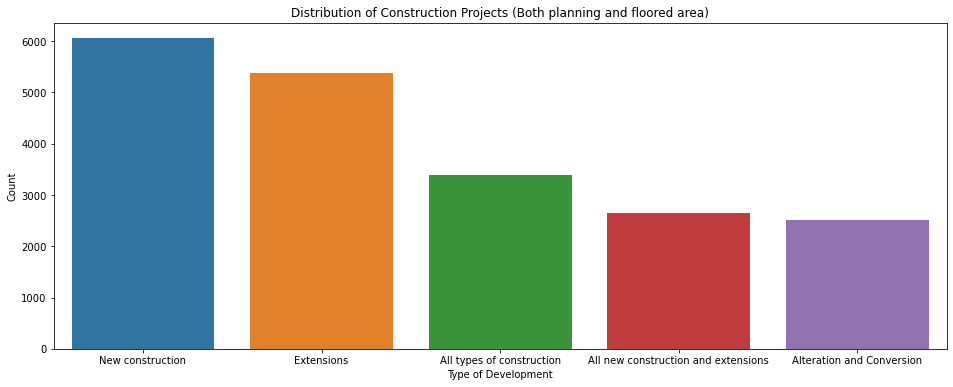

In [19]:
## Distribution of different types of construction projects (both planning and floored area permission granted)?
construction_counts = master['Type of Development'].value_counts()
construction_counts = pd.DataFrame(construction_counts)
construction_counts = construction_counts.reset_index()

# Set the figure size
plt.figure(figsize=(16, 6))

# Create the bar chart using seaborn
sns.barplot(x='index', 
            y = 'Type of Development', 
            data = construction_counts)

# Add labels and title
plt.xlabel('Type of Development')
plt.ylabel('Count')
plt.title('Distribution of Construction Projects (Both planning and floored area)')

# Display the plot
plt.show()

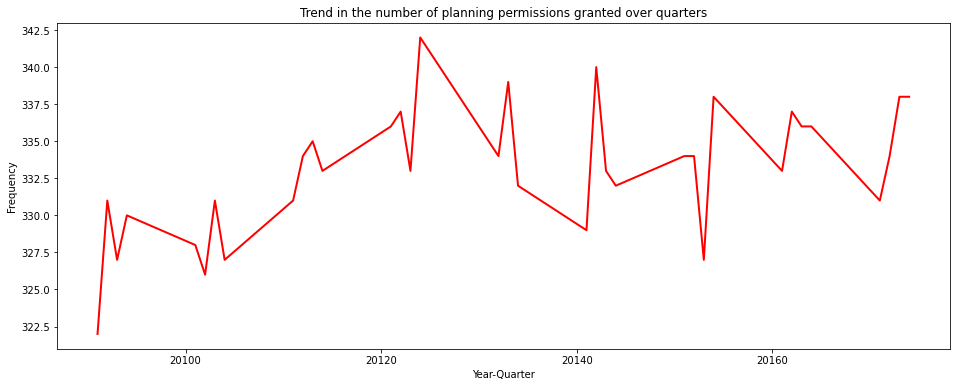

In [21]:
# Trend in the number of planning permissions granted over quarters:
# Assuming the dataset has a 'Quarter' column and a 'Planning_Permissions' column
quarterly_counts = data_planning.groupby('TLIST(Q1)')['Statistic Label'].count()
quarterly_counts = pd.DataFrame(quarterly_counts)
quarterly_counts = quarterly_counts.reset_index()

# Set the figure size
plt.figure(figsize=(16, 6))

# Line chart
sns.lineplot(x = 'TLIST(Q1)',
             y = 'Statistic Label', 
             data = quarterly_counts, 
             color = 'red', 
             linewidth = 2)

# Set labels and title
plt.xlabel('Year-Quarter')
plt.ylabel('Frequency')
plt.title('Trend in the number of planning permissions granted over quarters')

# Show the plot
plt.show()

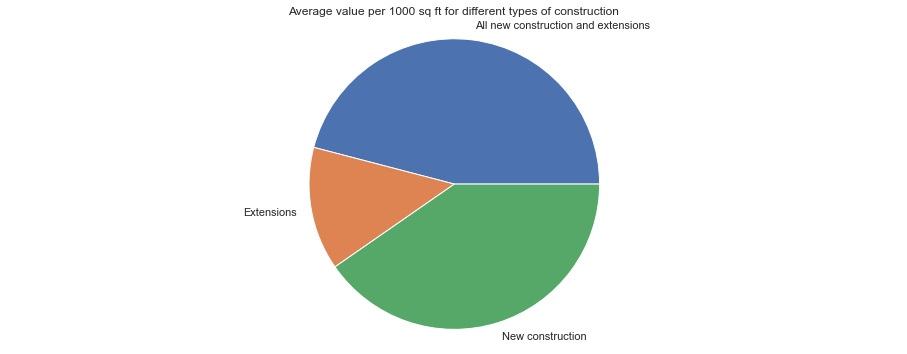

In [24]:
# Average value per 1000 sq ft for different types of construction:
average_value = data_floored.groupby('Type of Development')['VALUE'].mean()
average_value = pd.DataFrame(average_value)
average_value = average_value.reset_index()

# Set the figure size
plt.figure(figsize=(16, 6))

# Create the pie chart
plt.pie(average_value['VALUE'], 
        labels = average_value['Type of Development'])

# Apply seaborn style
sns.set()

# Set the aspect ratio to make the pie circular
plt.axis('equal')

# Set a title for the pie chart
plt.title('Average value per 1000 sq ft for different types of construction')

# Show the plot
plt.show()

In [23]:
average_value

Type of Development      VALUE
0  All new construction and extensions  58.597579
1                           Extensions  17.509378
2                     New construction  51.465498

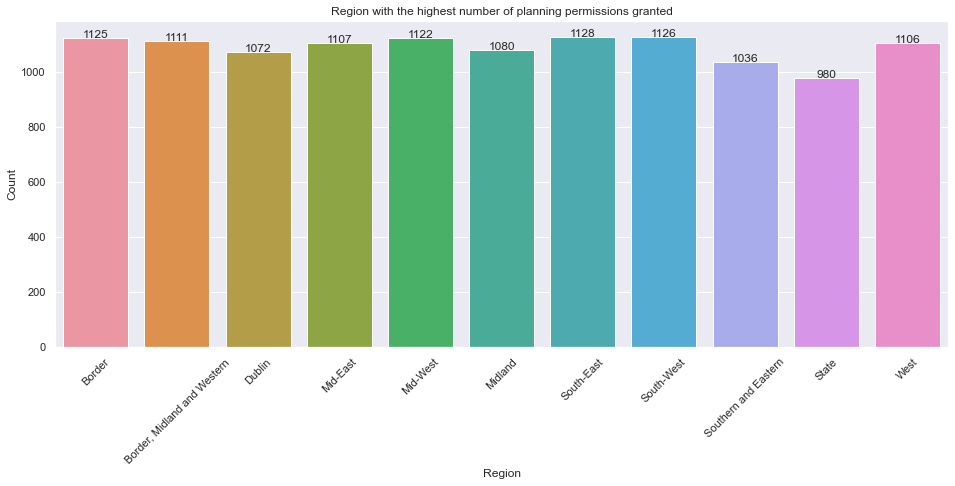

In [25]:
# Region with the highest number of planning permissions granted:
region_with_max_permissions = data_planning.groupby('Region')['Statistic Label'].count()
region_with_max_permissions = pd.DataFrame(region_with_max_permissions)
region_with_max_permissions = region_with_max_permissions.reset_index()

# Set the figure size
plt.figure(figsize=(16, 6))

# Create the bar chart using seaborn
sns.barplot(x = 'Region', 
            y = 'Statistic Label', 
            data = region_with_max_permissions)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region with the highest number of planning permissions granted')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add value labels to the bars
for index, row in region_with_max_permissions.iterrows():
    plt.text(row.name, row['Statistic Label'], str(row['Statistic Label']), ha='center')

# Display the plot
plt.show()

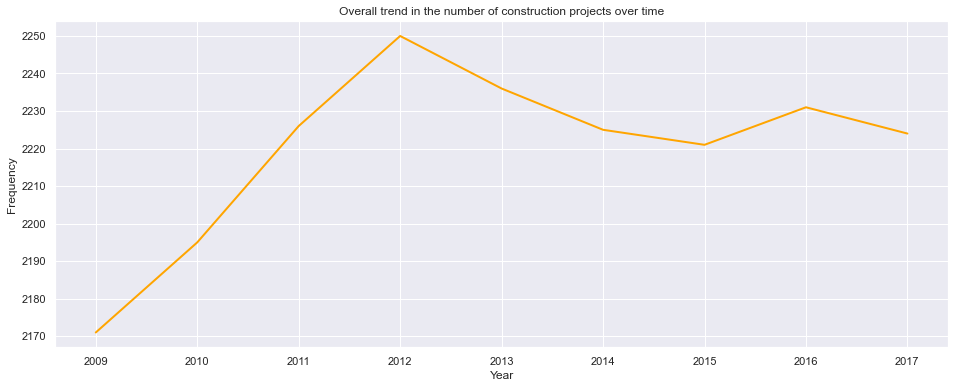

In [26]:
master['year'] = master['TLIST(Q1)'].astype(str).str[:4]
# Overall trend in the number of construction projects over time:
yearly_counts = master.groupby('year')['Type of Development'].count()
yearly_counts = pd.DataFrame(yearly_counts)
yearly_counts = yearly_counts.reset_index()

# Set the figure size
plt.figure(figsize=(16, 6))

# Line chart
sns.lineplot(x = 'year',
             y = 'Type of Development', 
             data = yearly_counts, 
             color = 'orange', 
             linewidth = 2)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Overall trend in the number of construction projects over time')

# Show the plot
plt.show()

## Machine Learning Task

### Prediction VALUE (sqft) for floored area using independent variables

In [27]:
# Remove statistic label as it is not required yet.
data_floored = data_floored.drop(['Statistic Label'], axis = 1)
from sklearn.preprocessing import LabelEncoder
# Convert string column(s) to numerical labels
label_encoder = LabelEncoder()
data_floored['Type of Development'] = label_encoder.fit_transform(data_floored['Type of Development'])
data_floored['Functional Category'] = label_encoder.fit_transform(data_floored['Functional Category'])
data_floored['Region'] = label_encoder.fit_transform(data_floored['Region'])

In [28]:
data_floored.head()

Type of Development  Functional Category  Region  TLIST(Q1)  VALUE
40                    2                    0       1      20101  388.0
41                    2                    0       1      20102  411.0
42                    2                    0       1      20103  370.0
43                    2                    0       1      20104  270.0
44                    2                    0       1      20111  247.0

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
X = data_floored.drop('VALUE', axis=1)
y = data_floored['VALUE']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Step 3: Choose a machine learning algorithm
model = RandomForestRegressor()

# Step 4: Define the hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [31]:
# Step 5: Perform hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [32]:
# Step 6: Train and evaluate the model
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 675.5282563343067
Root Mean Squared Error (RMSE): 25.990926423163653
Mean Absolute Error (MAE): 12.876478931998331
R-squared (R2) Score: 0.8892145743917446


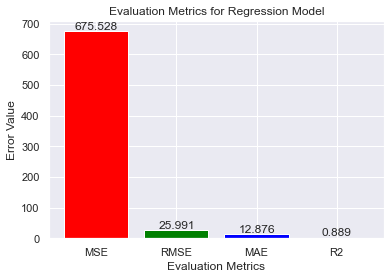

In [50]:
# Data for evaluation metrics
evaluation_metrics = ['MSE', 'RMSE', 'MAE', 'R2']
values = [mse, rmse, mae, r2]
values = [round(num, 3) for num in values]
# Create a bar plot
plt.bar(evaluation_metrics, values, color=['red', 'green', 'blue'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Error Value')

# Add values as labels to the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Evaluation Metrics for Regression Model')

# Display the plot
plt.show()

### Predict the "Type of Development" based on the "Functional Category", "Region", "TLIST(Q1)".

In [51]:
# Drop the value column as it is not required.
master = master.drop(['VALUE', 'year'], axis = 1)

# Label encode all categorical columns
master['Statistic Label'] = label_encoder.fit_transform(master['Statistic Label'])
master['Functional Category'] = label_encoder.fit_transform(master['Functional Category'])
master['Region'] = label_encoder.fit_transform(master['Region'])
master.head()

Statistic Label Type of Development  Functional Category  Region  \
40                0    New construction                    0       1   
41                0    New construction                    0       1   
42                0    New construction                    0       1   
43                0    New construction                    0       1   
44                0    New construction                    0       1   

    TLIST(Q1)  
40      20101  
41      20102  
42      20103  
43      20104  
44      20111

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Separate features and target
X = master.drop(['Type of Development'], axis = 1)
y = master['Type of Development']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier model
model = DecisionTreeClassifier()

# Define the hyperparameter search space
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [53]:
# Perform hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [54]:
# Train the model with the best hyperparameters
model = DecisionTreeClassifier(**best_params)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.2887887887887888
Precision: 0.29270351756845214
Recall: 0.2887887887887888
F1 Score: 0.2767554787360773


In [58]:
print(classification_report(y_test, y_pred))

                                     precision    recall  f1-score   support

All new construction and extensions       0.32      0.38      0.35       555
          All types of construction       0.30      0.18      0.22       655
          Alteration and Conversion       0.25      0.49      0.34       473
                         Extensions       0.29      0.36      0.32      1130
                   New construction       0.29      0.16      0.21      1183

                           accuracy                           0.29      3996
                          macro avg       0.29      0.31      0.29      3996
                       weighted avg       0.29      0.29      0.28      3996



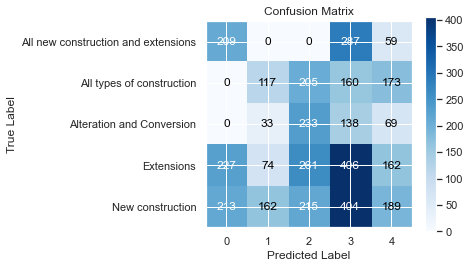

In [63]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(5)
plt.yticks(tick_marks, ['All new construction and extensions', 'All types of construction', 
                        'Alteration and Conversion', 'Extensions', 'New construction'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

# Display the plot
plt.show()

## Statistical Analysis

### Is there a significant difference in the mean floored area permission granted between different functional categories of development (Dwellings, Commerical Buildings and Health and Education only)?

In [66]:
data_floored_temp['Functional Category'].unique()

array(['All functional categories', 'Dwellings', 'Commercial Buildings',
       'Buildings for Agriculture', 'Industrial Buildings',
       'Govt., Health and Education', 'Other Buildings for Social Use'],
      dtype=object)

In [67]:
import scipy.stats as stats

# Perform one-way ANOVA
result = stats.f_oneway(data_floored_temp['VALUE'][data_floored_temp['Functional Category'] == 'Dwellings'],
                        data_floored_temp['VALUE'][data_floored_temp['Functional Category'] == 'Commercial Buildings'],
                        data_floored_temp['VALUE'][data_floored_temp['Functional Category'] == 'Govt., Health and Education'])

# Print the result
print("One-way ANOVA p-value:", result)

One-way ANOVA p-value: F_onewayResult(statistic=nan, pvalue=nan)


### How does the distribution of floored area permission granted vary across different regions (West, Mid-East and South East)?

In [61]:
data_floored_temp['Region'].unique()

array(['Border, Midland and Western', 'Border', 'Midland', 'West',
       'Southern and Eastern', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West', 'State'], dtype=object)

In [63]:
import scipy.stats as stats

# Perform Kruskal-Wallis test
result = stats.kruskal(data_floored_temp['VALUE'][data_floored_temp['Region'] == 'West'],
                       data_floored_temp['VALUE'][data_floored_temp['Region'] == 'Mid-East'],
                       data_floored_temp['VALUE'][data_floored_temp['Region'] == 'South-East'])

# Print the result
print("Kruskal-Wallis p-value:", result)

Kruskal-Wallis p-value: KruskalResult(statistic=29.220860136958805, pvalue=4.516175839264055e-07)


### Is there a significant association between the Type of Development and the Functional Category for those where planning permission is granted?

In [65]:
# Create a contingency table
contingency_table = pd.crosstab(data_planning_temp['Type of Development'], 
                                data_planning_temp['Functional Category'])

# Perform Chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the result
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 1475.5628487069712
p-value: 3.45272981255281e-297


In [88]:
data_CI_IE = pd.read_csv('national_house_construction_cost_index_0 (1).csv', skiprows = 2)
data_CI_IE = data_CI_IE[["2015"]]
data_CI_IE = data_CI_IE.head(12)
data_CI_UK = pd.read_excel('bulletindataset9.xlsx', sheet_name = "All construction", skiprows = 4)
data_CI_UK = data_CI_UK.iloc[12:24]
data_CI_UK = data_CI_UK[["All new work\nindex, (2015=100)"]]
data_CI_UK = data_CI_UK.reset_index(drop=True)
data_CI_IE = data_CI_IE.reset_index(drop=True)
master = pd.concat([data_CI_IE, data_CI_UK], axis=1)
master.rename(columns = {'2015': 'IE 2015', 'All new work\nindex, (2015=100)':'UK 2015'}, inplace = True)
master

IE 2015  UK 2015
0    206.2     98.7
1      206     99.5
2    206.5    100.8
3    206.8     99.6
4    207.2     99.6
5    207.6    100.0
6    207.4    100.6
7    207.4     99.9
8    207.3     99.9
9    207.2    100.4
10   207.6    100.9
11   207.4    100.0

### Is there a significant difference in the mean construction cost index between the UK and Ireland in 2015?

In [91]:
# Perform independent samples t-test
master['IE 2015'] = pd.to_numeric(master['IE 2015'])
t_stat, p_value = stats.ttest_ind(master['IE 2015'], master['UK 2015'])

# Print the test result
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 448.56211210271925
P-value: 4.485875896225427e-45


### Are the construction cost indices in the UK and Ireland in 2015 positively correlated?

In [92]:
# Perform Pearson correlation test
corr_coef, p_value = stats.pearsonr(master['IE 2015'], master['UK 2015'])

# Print the test result
print("Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

Correlation Coefficient: 0.5191049976783014
P-value: 0.08372633234798409
